### Predicting Beta (Effect Size)
##### Linear Regression - proof for Double-Descent in Machine Learning

In [47]:
# Data Manipulation
import os
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Exploration

In [31]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(location, sep="\t")

def parse_csv(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(location, sep=",")

In [32]:
df = read_file("/Users/guillermocomesanacimadevila/Desktop/EFO_0004574_associations_export.tsv")

In [33]:
df.shape # 9640 SNPs

(9640, 15)

In [34]:
df.head(n=10)

,riskAllele,pValue,pValueAnnotation,riskFrequency,orValue,beta,ci,mappedGenes,traitName,efoTraits,bgTraits,accessionId,locations,pubmedId,author
0,rs660240-T,2.000000e-12,-,0.215342,-,0.0407522 unit decrease,[0.029-0.052],CELSR2,Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,1:109275216,36764567,Davyson E
1,rs668948-G,5.000000e-22,-,0.179767,-,0.0596676 unit decrease,[0.048-0.072],"TDRD15,APOB",Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,2:21068657,36764567,Davyson E
2,rs146534110-T,6.000000e-13,-,0.0134888,-,0.148371 unit increase,[0.11-0.19],SLC22A1,Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,6:160157037,36764567,Davyson E
3,rs117733303-G,1.000000e-80,-,0.0178411,-,0.341533 unit increase,[0.31-0.38],LPAL2,Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,6:160501838,36764567,Davyson E
4,rs118039278-A,1.000000e-200,-,0.078451,-,0.276321 unit increase,[0.26-0.29],LPA,Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,6:160564494,36764567,Davyson E
5,rs73596816-A,9.000000e-26,-,0.0331501,-,0.13941 unit increase,[0.11-0.17],LPA,Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,6:160596331,36764567,Davyson E
6,rs115478735-T,2.000000e-19,-,0.183899,-,0.0555015 unit increase,[0.043-0.068],ABO,Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,9:133274295,36764567,Davyson E
7,rs1532085-A,8.000000e-91,-,0.384943,-,0.0984173 unit increase,[0.089-0.108],ALDH1A2,Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,15:58391167,36764567,Davyson E
8,rs1077835-G,2.000000e-82,-,0.218626,-,0.110598 unit increase,[0.099-0.122],"ALDH1A2,LIPC",Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,15:58431227,36764567,Davyson E
9,rs821840-G,2.000000e-64,-,0.324538,-,0.0858703 unit decrease,[0.076-0.096],"HERPUD1,CETP",Cholesterol to total lipids in chylomicrons an...,cholesterol to total lipids in chylomicrons an...,-,GCST90269677,16:56959974,36764567,Davyson E


In [35]:
df.isna().sum() # all good

riskAllele          0
pValue              0
pValueAnnotation    0
riskFrequency       0
orValue             0
beta                0
ci                  0
mappedGenes         0
traitName           0
efoTraits           0
bgTraits            0
accessionId         0
locations           0
pubmedId            0
author              0
dtype: int64

In [36]:
df.columns
df["pValueAnnotation"].unique()

array(['-', '(total cholesterol)', '(European)', '(AA)', '(EA)',
       '(conditional)', '(TC )', '(TC)', '(BMI unadjusted)',
       '(BMI adjusted)', '(Asian initial, BMI unadjusted)',
       '(Trans-ethnic initial)', '(Hispanic)', '(Hispanic/Latino)',
       '(East Asian)', '(Filipino)', '(conditional on round 3)',
       '(Indian)', '(Conditioned on rs12657266)',
       '(Conditioned on rs3852789)', '(Conditioned on rs141622900)',
       '(Conditioned on rs5753021)', '(Conditioned on rs119480069)',
       '(Conditioned on rs10474433)', '(Conditioned on rs183130)',
       '(Conditioned on rs60191209)', '(Conditioned on rs73596816)',
       '(Conditioned on rs11082764)', '(Conditioned on rs1532085)',
       '(Conditioned on rs2738464)', '(Conditioned on rs998870472)',
       '(Conditioned on rs486142)', '(Conditioned on rs9994887)',
       '(Conditioned on rs662799)', '(Conditioned on rs2575876)',
       '(Conditioned on rs529192228)', '(Conditioned on rs6029632)',
       '(Conditione

### Data Pre-processing

In [37]:
df2 = df.head(n=1000)

# check only 500 SNPs
df2.shape

# Export to CSV
df2.to_csv("fiveh_snps.csv", header=False)

In [38]:
df2.head(n=5)
df2 = df.drop(columns = ["traitName", "efoTraits", "author", "pubmedId", "bgTraits", "pValueAnnotation"])
df2.shape

(9640, 9)

In [39]:
df2 = df2.head(n=500)
df2.shape

(500, 9)

In [40]:
df2.isna().sum()
df2.to_csv("fiveh_snps.csv", header=True)

In [41]:
df2

,riskAllele,pValue,riskFrequency,orValue,beta,ci,mappedGenes,accessionId,locations
0,rs660240-T,2.000000e-12,0.215342,-,0.0407522 unit decrease,[0.029-0.052],CELSR2,GCST90269677,1:109275216
1,rs668948-G,5.000000e-22,0.179767,-,0.0596676 unit decrease,[0.048-0.072],"TDRD15,APOB",GCST90269677,2:21068657
2,rs146534110-T,6.000000e-13,0.0134888,-,0.148371 unit increase,[0.11-0.19],SLC22A1,GCST90269677,6:160157037
3,rs117733303-G,1.000000e-80,0.0178411,-,0.341533 unit increase,[0.31-0.38],LPAL2,GCST90269677,6:160501838
4,rs118039278-A,1.000000e-200,0.078451,-,0.276321 unit increase,[0.26-0.29],LPA,GCST90269677,6:160564494
...,...,...,...,...,...,...,...,...,...
495,rs562338-A,1.000000e-63,0.179822,-,0.100471 unit decrease,[0.089-0.112],"APOB,TDRD15",GCST90269623,2:21065449
496,rs4299376-G,6.000000e-21,0.323605,-,0.0461548 unit increase,[0.037-0.056],ABCG8,GCST90269623,2:43845437
497,rs3843480-C,2.000000e-32,0.375198,-,0.0561109 unit increase,[0.047-0.065],"ANKRD31,HMGCR",GCST90269623,5:75328657
498,rs7773004-A,3.000000e-11,0.505338,-,0.0321601 unit decrease,[0.023-0.042],"H2BC9,H3C8",GCST90269623,6:26267527


In [42]:
reg = df2[["riskAllele", "beta"]]
reg # Need to get rid of the "unit decrease" thingy - SQL
reg.to_csv("beta_snp.csv", header=True)

In [43]:
reg2 = parse_csv("/Users/guillermocomesanacimadevila/Desktop/beta_snps.csv")
reg2 = reg2[["riskAllele", "beta_cleaned"]]
reg2.rename(columns={"riskAllele": "SNP"}, inplace=True)

In [45]:
reg2.shape
reg2
reg2.to_csv("beta_snps.csv", header=True)

### Linear Regression (Just SNPs and Beta)

In [50]:
reg2.rename(columns={"beta_cleaned": "beta"}, inplace=True)
reg2.columns # check

Index(['SNP', 'beta'], dtype='object')

In [51]:
reg2.isna().sum()

SNP     0
beta    0
dtype: int64

In [52]:
# Encode SNP names as numerical for regression
reg2["SNP_encoded"] = reg2["SNP"].astype("category").cat.codes

In [55]:
reg2["SNP_encoded"].unique().sum()

8385

In [56]:
# Splitting into training and test data
X = reg2[["SNP_encoded"]]
y = reg2[["beta"]]

# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions 
y_pred = model.predict(X_test)

### Performance Metric Check
##### MAE, MSE, R2

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 0.04199747806356929
MSE: 0.002705974643578093
R2 Score: -0.0024198424009722608


### Data Visualisation

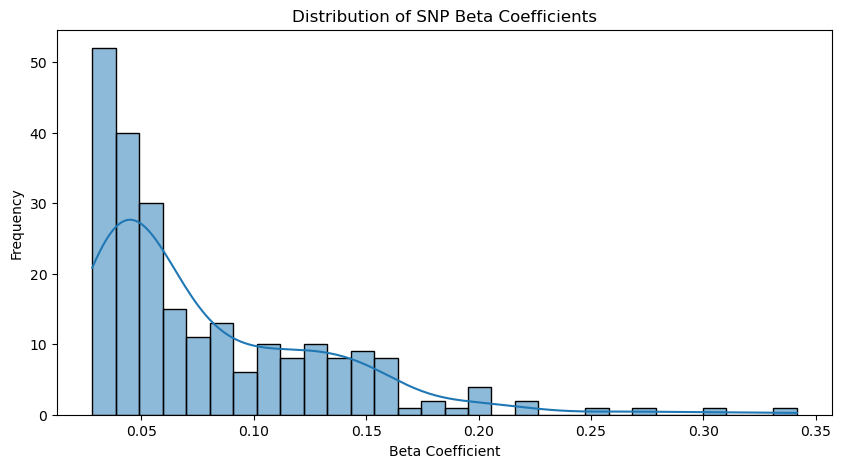

In [61]:
# Beta coefficient histogram
plt.figure(figsize=(10, 5))
sns.histplot(reg2["beta"], bins=30, kde=True)
plt.xlabel("Beta Coefficient")
plt.ylabel("Frequency")
plt.title("Distribution of SNP Beta Coefficients")
plt.show()

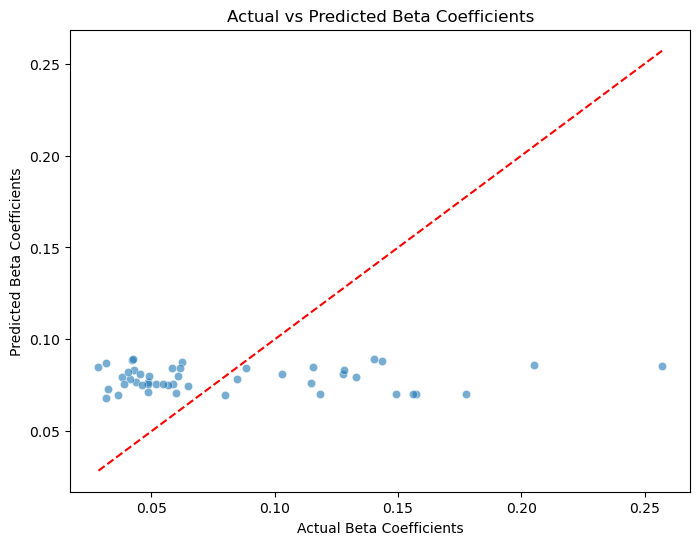

In [64]:
plt.figure(figsize=(8, 6))

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  
plt.xlabel("Actual Beta Coefficients")
plt.ylabel("Predicted Beta Coefficients")
plt.title("Actual vs Predicted Beta Coefficients")
plt.show()